# Import libraries


In [1]:
!pip install autoviml

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [2]:
!pip install langdetect

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 981 kB 4.1 MB/s 
  Created wheel for langdetect: filename=langdetect-1.0.9-py3-none-any.whl size=993242 sha256=36b0603a2a3cef1087e3f18b700980cfb06ee9d2a7e5448b2ba6b2ec2d09522c
  Stored in directory: /root/.cache/pip/wheels/13/c7/b0/79f66658626032e78fc1a83103690ef6797d551cb22e56e734
Successfully built langdetect


In [3]:
import pandas as pd
import numpy as np
from collections import Counter
from tqdm import tqdm
from autoviml.Auto_ViML import Auto_ViML
from langdetect import detect, DetectorFactory
    
DetectorFactory.seed = 0

Imported Auto_ViML version: 0.1.710. Call using:
             m, feats, trainm, testm = Auto_ViML(train, target, test,
                            sample_submission='',
                            scoring_parameter='', KMeans_Featurizer=False,
                            hyper_param='RS',feature_reduction=True,
                             Boosting_Flag='CatBoost', Binning_Flag=False,
                            Add_Poly=0, Stacking_Flag=False,Imbalanced_Flag=False,
                            verbose=1)
            

Imported Auto_NLP version: 0.1.01.. Call using:
     train_nlp, test_nlp, nlp_pipeline, predictions = Auto_NLP(
                nlp_column, train, test, target, score_type='balanced_accuracy',
                modeltype='Classification',top_num_features=200, verbose=0,
                build_model=True)


In [4]:
import matplotlib.pyplot as plt
import seaborn as sns

from pandas.plotting import scatter_matrix
from sklearn.preprocessing import MinMaxScaler, Normalizer
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.multiclass import OneVsRestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, recall_score
from sklearn.model_selection import GridSearchCV, cross_val_score
from sklearn.svm import SVC
import xgboost as xgb

In [5]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Getting the Data

In [6]:
train = pd.read_csv('/content/drive/MyDrive/shai-training-level-1-b/train.csv')
test = pd.read_csv('/content/drive/MyDrive/shai-training-level-1-b/test.csv')
sub = pd.read_csv('/content/drive/MyDrive/shai-training-level-1-b/sub11.csv')


# Data Analysis

In [7]:
sub.columns.unique()

Index(['Acoustic/Folk_0', 'Alt_Music_1', 'Blues_2', 'Bollywood_3', 'Country_4',
       'HipHop_5', 'Indie Alt_6', 'Instrumental_7', 'Metal_8', 'Pop_9',
       'Rock_10'],
      dtype='object')

In [8]:
train.head(5)

,id,Artist Name,Track Name,Popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_in min/ms,time_signature,Class
0,0,"Lata Mangeshkar, Hariharan",Likha Hai Yeh,23.00,0.37,0.67,7.00,-11.01,0,0.04,0.81,0.00,0.24,0.80,177.16,5.21,3,3
1,1,Kalan.FrFr,No Love ft. Mozzy & Cypress Moreno,45.00,0.66,0.64,6.00,-8.14,1,0.39,0.42,NaN,0.12,0.69,99.52,"206,602.00",4,5
2,2,The Cure,Play For Today,51.00,0.46,0.73,11.00,-12.05,0,0.14,0.05,0.02,0.12,0.78,80.42,"218,960.00",4,6
3,3,Miguel Poveda,Coplas Del Querer,40.00,0.51,0.29,5.00,-8.90,0,0.05,0.83,NaN,0.10,0.32,96.14,"332,467.00",3,9
4,4,Leif Vollebekk,Long Blue Light,63.00,0.55,0.48,9.00,-9.11,1,0.03,0.52,0.11,0.16,0.51,71.55,"200,173.00",4,1


In [9]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14396 entries, 0 to 14395
Data columns (total 18 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   id                  14396 non-null  int64  
 1   Artist Name         14396 non-null  object 
 2   Track Name          14396 non-null  object 
 3   Popularity          14045 non-null  float64
 4   danceability        14396 non-null  float64
 5   energy              14396 non-null  float64
 6   key                 12784 non-null  float64
 7   loudness            14396 non-null  float64
 8   mode                14396 non-null  int64  
 9   speechiness         14396 non-null  float64
 10  acousticness        14396 non-null  float64
 11  instrumentalness    10837 non-null  float64
 12  liveness            14396 non-null  float64
 13  valence             14396 non-null  float64
 14  tempo               14396 non-null  float64
 15  duration_in min/ms  14396 non-null  float64
 16  time

In [10]:
test.corr()

,id,Popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_in min/ms,time_signature
id,1.00,-0.02,-0.02,-0.01,-0.01,-0.01,0.01,0.01,-0.01,0.00,-0.00,-0.02,-0.02,0.02,0.00
Popularity,-0.02,1.00,0.17,0.09,0.01,0.16,0.02,0.04,-0.16,-0.15,-0.07,0.04,0.01,-0.00,0.06
danceability,-0.02,0.17,1.00,-0.07,0.00,0.08,-0.07,0.19,-0.01,-0.22,-0.11,0.43,-0.18,-0.12,0.15
energy,-0.01,0.09,-0.07,1.00,0.03,0.77,-0.03,0.12,-0.73,-0.17,0.20,0.22,0.18,0.25,0.12
key,-0.01,0.01,0.00,0.03,1.00,0.00,-0.10,-0.00,-0.01,0.02,0.02,0.02,0.00,0.01,-0.02
loudness,-0.01,0.16,0.08,0.77,0.00,1.00,-0.01,0.08,-0.61,-0.34,0.10,0.19,0.14,0.18,0.10
mode,0.01,0.02,-0.07,-0.03,-0.10,-0.01,1.00,-0.05,0.02,-0.06,-0.01,-0.01,0.06,-0.07,-0.01
speechiness,0.01,0.04,0.19,0.12,-0.00,0.08,-0.05,1.00,-0.09,-0.05,0.08,0.04,0.01,0.02,0.07
acousticness,-0.01,-0.16,-0.01,-0.73,-0.01,-0.61,0.02,-0.09,1.00,0.16,-0.12,-0.12,-0.16,-0.34,-0.12
instrumentalness,0.00,-0.15,-0.22,-0.17,0.02,-0.34,-0.06,-0.05,0.16,1.00,-0.03,-0.23,-0.04,-0.00,-0.07


In [11]:
train.isna().sum()

id                       0
Artist Name              0
Track Name               0
Popularity             351
danceability             0
energy                   0
key                   1612
loudness                 0
mode                     0
speechiness              0
acousticness             0
instrumentalness      3559
liveness                 0
valence                  0
tempo                    0
duration_in min/ms       0
time_signature           0
Class                    0
dtype: int64

In [12]:
test.isnull().sum()

id                      0
Artist Name             0
Track Name              0
Popularity             77
danceability            0
energy                  0
key                   402
loudness                0
mode                    0
speechiness             0
acousticness            0
instrumentalness      818
liveness                0
valence                 0
tempo                   0
duration_in min/ms      0
time_signature          0
dtype: int64

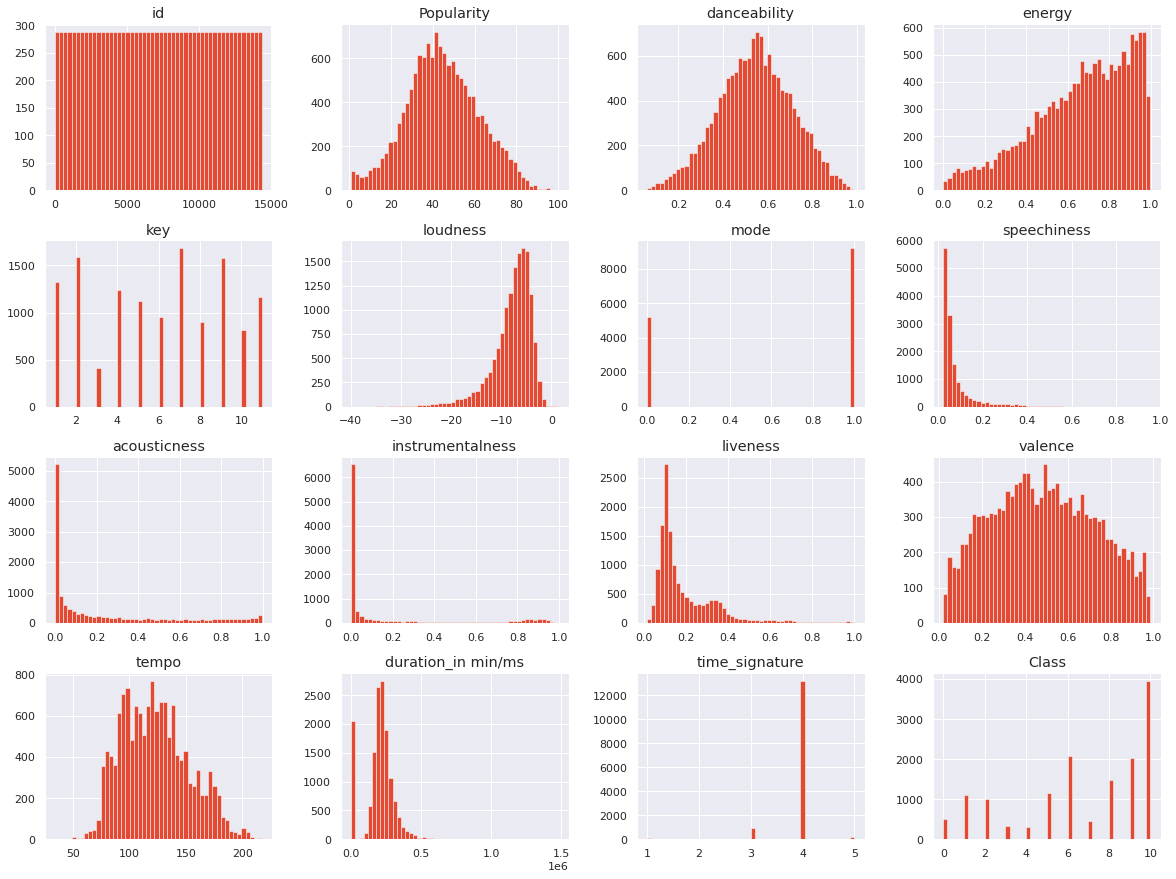

In [13]:
train.hist(bins=50, figsize=(20,15))
plt.show()

<AxesSubplot: >

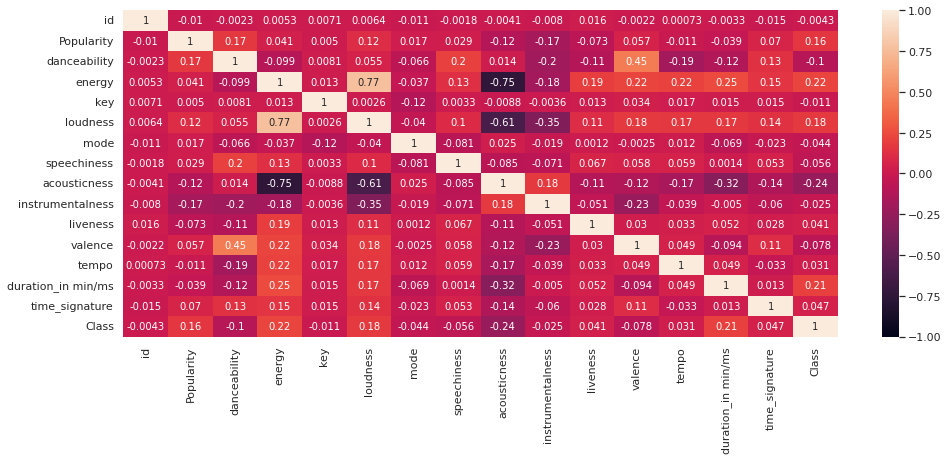

In [14]:
df_cont = train.select_dtypes([int,float]) 

plt.figure(figsize=(16, 6))
sns.heatmap(data = df_cont.corr(), vmin = -1, vmax = 1, annot = True) 

In [15]:
test['Class'] = -1
# Coalescing the two columns for data treatment
full=train.append(test)
full=full.reset_index()
full=full.drop('index',axis=1)
print(full.shape)

(17996, 18)


In [16]:
test

,id,Artist Name,Track Name,Popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_in min/ms,time_signature,Class
0,0,Pale Waves,She's My Religion,52.00,0.52,0.73,4.00,-4.12,1,0.04,0.35,0.00,0.15,0.33,161.87,"189,587.00",4,-1
1,1,Mungo Jerry,In the Summertime,69.00,0.75,0.45,4.00,-14.01,1,0.06,0.72,NaN,0.16,0.97,82.75,"211,880.00",4,-1
2,2,Buddy Holly & The Crickets,Maybe Baby,50.00,0.61,0.48,9.00,-12.90,1,0.03,0.71,NaN,0.25,0.89,136.61,"122,600.00",4,-1
3,3,Superheaven,Life In a Jar,40.00,0.48,0.87,1.00,-5.59,1,0.06,0.00,0.00,0.15,0.35,150.03,"222,208.00",4,-1
4,4,HARDY,GIVE HEAVEN SOME HELL,64.00,0.64,0.84,11.00,-4.97,1,0.04,0.05,NaN,0.09,0.53,126.05,"217,802.00",4,-1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3595,3595,Wretch 32,Ina Di Ghetto (feat. Badness & Ghetto),36.00,0.48,0.75,2.00,-5.77,1,0.25,0.01,NaN,0.17,0.12,140.27,"234,806.00",4,-1
3596,3596,Lower Than Atlantis,Had Enough,45.00,0.56,0.82,2.00,-4.85,1,0.10,0.00,0.00,0.49,0.53,93.50,"200,760.00",4,-1
3597,3597,Ride,Future Love - Reimagined by P√™tr Aleks√§nder instrumental,50.00,0.20,0.29,10.00,-18.82,1,0.04,0.01,0.50,0.25,0.04,149.44,"183,187.00",4,-1
3598,3598,"Antonio Vivaldi, Andrew Watkinson, City of London Sinfonia, Nicholas Kraemer","Violin Concerto in B-Flat Major, Op. 4, No. 1, RV 383a: II. Largo",23.00,0.22,0.08,10.00,-24.88,1,0.04,0.93,0.01,0.13,0.09,84.59,2.73,4,-1


In [17]:
full

,id,Artist Name,Track Name,Popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_in min/ms,time_signature,Class
0,0,"Lata Mangeshkar, Hariharan",Likha Hai Yeh,23.00,0.37,0.67,7.00,-11.01,0,0.04,0.81,0.00,0.24,0.80,177.16,5.21,3,3
1,1,Kalan.FrFr,No Love ft. Mozzy & Cypress Moreno,45.00,0.66,0.64,6.00,-8.14,1,0.39,0.42,NaN,0.12,0.69,99.52,"206,602.00",4,5
2,2,The Cure,Play For Today,51.00,0.46,0.73,11.00,-12.05,0,0.14,0.05,0.02,0.12,0.78,80.42,"218,960.00",4,6
3,3,Miguel Poveda,Coplas Del Querer,40.00,0.51,0.29,5.00,-8.90,0,0.05,0.83,NaN,0.10,0.32,96.14,"332,467.00",3,9
4,4,Leif Vollebekk,Long Blue Light,63.00,0.55,0.48,9.00,-9.11,1,0.03,0.52,0.11,0.16,0.51,71.55,"200,173.00",4,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17991,3595,Wretch 32,Ina Di Ghetto (feat. Badness & Ghetto),36.00,0.48,0.75,2.00,-5.77,1,0.25,0.01,NaN,0.17,0.12,140.27,"234,806.00",4,-1
17992,3596,Lower Than Atlantis,Had Enough,45.00,0.56,0.82,2.00,-4.85,1,0.10,0.00,0.00,0.49,0.53,93.50,"200,760.00",4,-1
17993,3597,Ride,Future Love - Reimagined by P√™tr Aleks√§nder instrumental,50.00,0.20,0.29,10.00,-18.82,1,0.04,0.01,0.50,0.25,0.04,149.44,"183,187.00",4,-1
17994,3598,"Antonio Vivaldi, Andrew Watkinson, City of London Sinfonia, Nicholas Kraemer","Violin Concerto in B-Flat Major, Op. 4, No. 1, RV 383a: II. Largo",23.00,0.22,0.08,10.00,-24.88,1,0.04,0.93,0.01,0.13,0.09,84.59,2.73,4,-1


In [18]:
# Preprocessing and feature extraction
dur = full['duration_in min/ms']
track = []
clean = []
for i in dur:
    if i<=100 :
        clean.append(i)
        track.append(0)
    else:
        clean.append(i/60000)
        track.append(1)
full['duration_in min/ms'] = clean
full['new1'] = track

In [19]:
# Feature engineering 

def count_special_character(string):  
    special_char= 0
    for i in range(0, len(string)):       
        ch = string[i]
        if (string[i].isdigit()):
            continue      
        else: 
            special_char += 1
    return special_char

def feature_engineering(df):
    #New features
    print("Adding new features")
    df['new2'] = df['Artist Name'].apply(len)                        #lenght of Artist Name
    df['new3'] = df['Track Name'].apply(len)                         #Lenht of Song_Name
    df['new4'] = df['Artist Name'].str.split().str.len()             #Words in Artist Name
    df['new5'] = df['Track Name'].str.split().str.len()              #Words in Song_Name
    df['new6'] = df['Artist Name'].str.findall(r'[A-Z]').str.len()   #Count Uppercases in name
    df['new7'] = df['Artist Name'].str.findall(r'[a-z]').str.len()   #Count Lowercases in name
    df['new8'] = df['Artist Name'].str.findall(r'[0-9]').str.len()   #Count Digits in name
    df['new9'] = df['Track Name'].str.findall(r'[A-Z]').str.len()    #Count Uppercases in Song_Name
    df['new10'] = df['Track Name'].str.findall(r'[a-z]').str.len()   #Count Lowercases in Song_Name
    df['new11'] = df['Track Name'].str.findall(r'[0-9]').str.len()   #Count Digits in Song_Name
    df['new12'] = df['new2'] - (df['new6'] + df['new7'])             #Count others char Artist Name
    df['new12'] = df['new3'] - (df['new9'] + df['new10'])            #Count others char in Song_Name

feature_engineering(full)

Adding new features


In [20]:
# Clean up text using regex
import re
def clean_text(text):
    text = text.lower()
    #text = re.sub(r'@[a-zA-Z0-9_]+', '', text)   
    #text = re.sub(r'https?://[A-Za-z0-9./]+', '', text)   
    #text = re.sub(r'www.[^ ]+', '', text)  
    #text = re.sub(r'[a-zA-Z0-9]*www[a-zA-Z0-9]*com[a-zA-Z0-9]*', '', text)  
    #text = re.sub(r'[^a-zA-Z]', ' ', text)   
    #text = [token for token in text.split() if len(token) > 2]
    #text = ' '.join(text)
    return text

full['Artist Name'] = full['Artist Name'].apply(clean_text)
full['Track Name'] = full['Track Name'].apply(clean_text)

In [21]:
# additional feature  
full['truc'] = full['Artist Name'] + full['Track Name'] + full['Artist Name'] + full['Track Name'] + full['Artist Name'] + full['Track Name']
txt = full['truc']
lang = []
for i in tqdm(txt):
    try:
        lang.append(detect(i))
    except:
        lang.append('err')
         
del full['truc']
full['lang'] = lang



100%|██████████| 17996/17996 [03:55<00:00, 76.50it/s]


In [22]:
train2 = full[full['Class']!=-1]
test2 = full[full['Class']==-1]

==================== System Information ====================
System: Linux
Node Name: d15e7512bfa7
Release: 5.10.133+
Version: #1 SMP Fri Aug 26 08:44:51 UTC 2022
Machine: x86_64
Processor: x86_64
====================== CPU Information ======================
Physical cores: 1
Total cores: 2
==================== Memory Information ====================
Total: 12.68GB
Available: 11.21GB
Used: 1.29GB
================== System Information End ==================
##############  D A T A   S E T  A N A L Y S I S  #######################
Training Set Shape = (14396, 31)
    Training Set Memory Usage = 3.51 MB
Test Set Shape = (3600, 31)
    Test Set Memory Usage = 0.88 MB
Single_Label Target: ['Class']
Random shuffling the data set before training
    Using RandomizedSearchCV for Hyper Parameter Tuning. This is 3X faster than GridSearchCV...
ALERT! Setting Imbalanced_Flag to True in Auto_ViML for Multi_Classification problems improves results!
       Class  -> Counts -> Percent
           0:   

[nltk_data] Downloading collection 'popular'
[nltk_data]    | 
[nltk_data]    | Downloading package cmudict to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/cmudict.zip.
[nltk_data]    | Downloading package gazetteers to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/gazetteers.zip.
[nltk_data]    | Downloading package genesis to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/genesis.zip.
[nltk_data]    | Downloading package gutenberg to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/gutenberg.zip.
[nltk_data]    | Downloading package inaugural to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/inaugural.zip.
[nltk_data]    | Downloading package movie_reviews to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping corpora/movie_reviews.zip.
[nltk_data]    | Downloading package names to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/names.zip.
[nltk_data]    | Downloading package shakespeare to /root/nltk_data...
[nlt

Auto NLP processing on NLP Column: Artist Name
Shape of Train Data: 14396 rows
    Shape of Test Data: 3600 rows


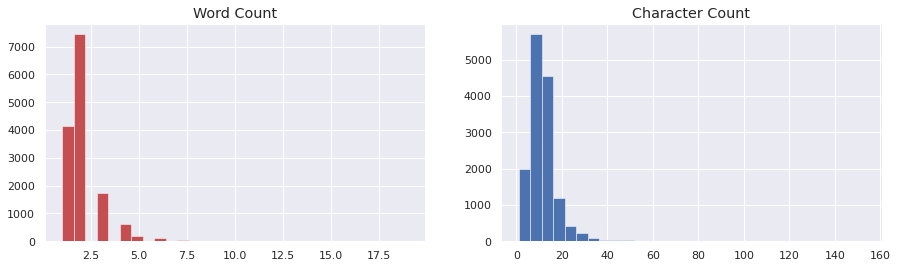

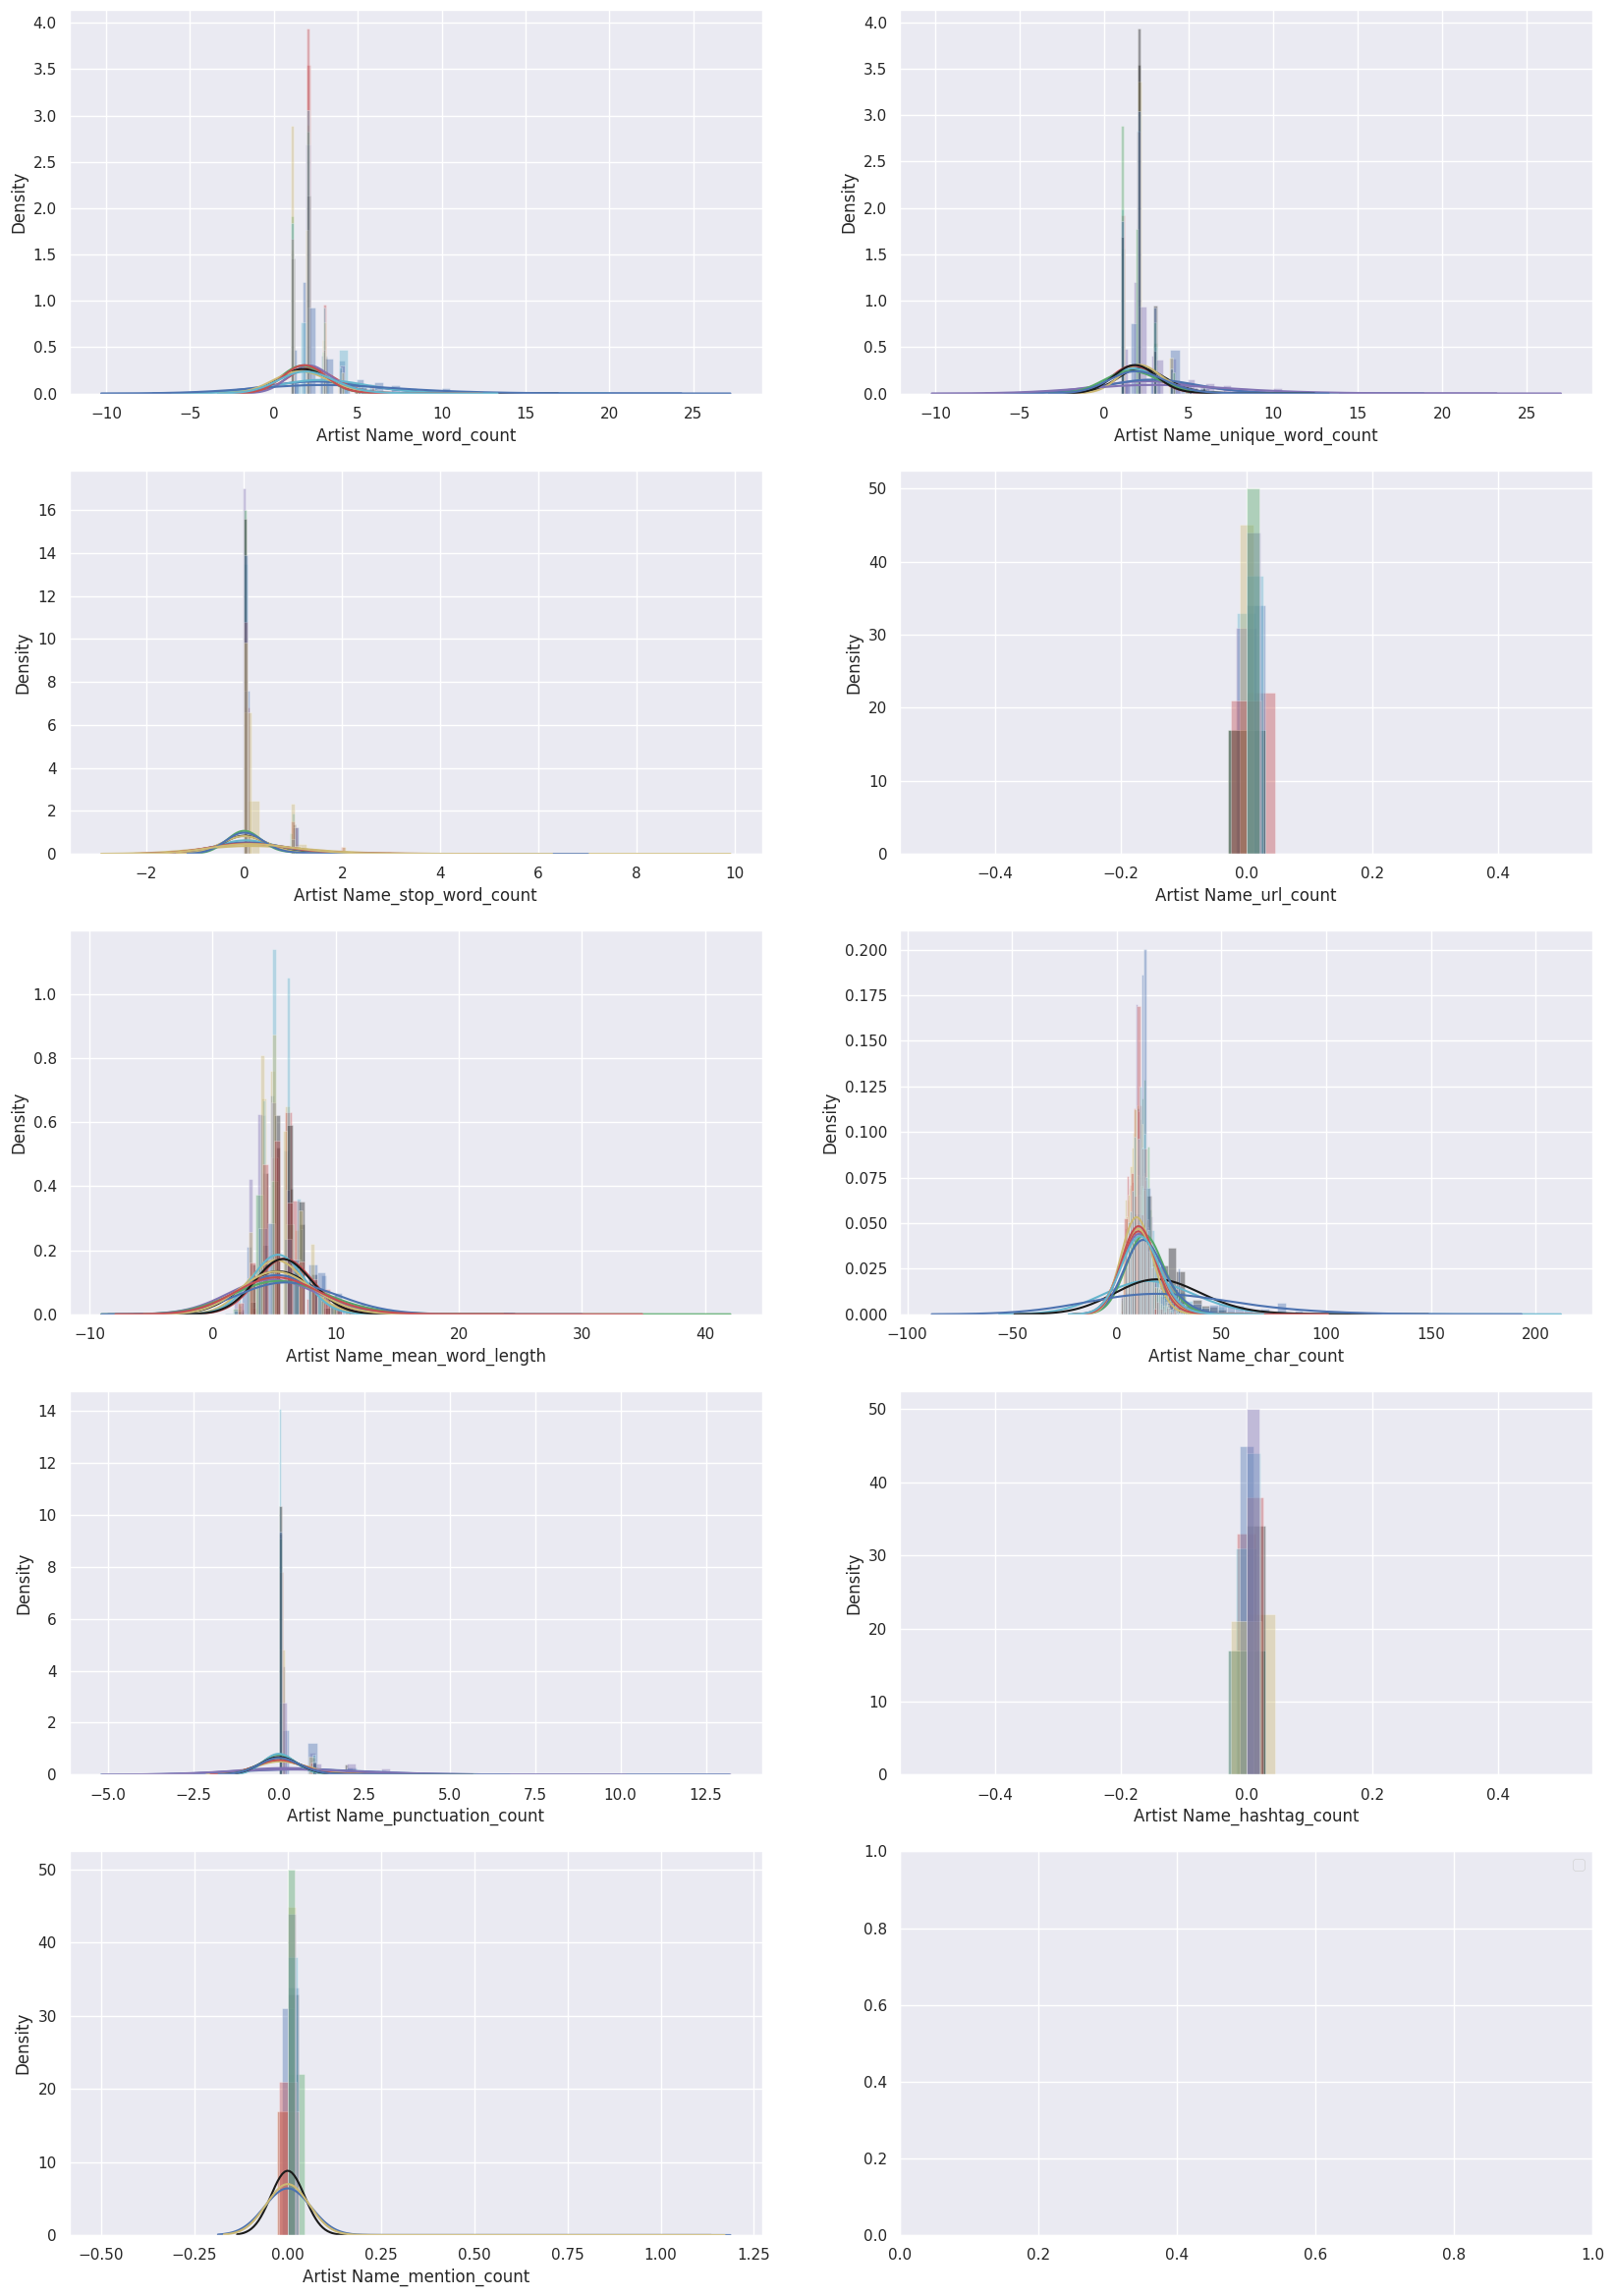

    Added 9 summary columns for counts of words and characters in each row
Cleaning text in Train data for Artist Name column
    Faster text processing using clean_text function, since top_num_features is below 300
    Time Taken for Expanding emojis and abbreviations in data = 0 seconds
        Time Taken for Processing text in data = 14 seconds
Train data Text cleaning completed. Time taken = 24 seconds

For target = Class

    For class = 0
Top 200 n-grams
: ['feat', 'john', 'khan', 'advaita', 'love', 'light', 'paul', 'davy', 'megan', 'mahesh', 'raghvan', 'beatles', 'james', 'prine', 'give', 'shadow', 'ed', 'sheeran', 'peter', 'j', 'woman', 'rise', 'harper', 'smith', 'shankar', 'your', 'jamie', 'joy', 'kale', 'prakash', 'ali', 'mayer', 'george', 'simon', 'allison', 'bad', 'band', 'christian', 'dan', 'day', 'haricharan', 'heart', 'lose', 'new', 'noah', 'passenger', 'river', 'saindhavi', 'sharma', 'song', 'wait', 'know', 'indianraga', 'krishna', 'come', 'kingdom', 'god', 'good', 'har

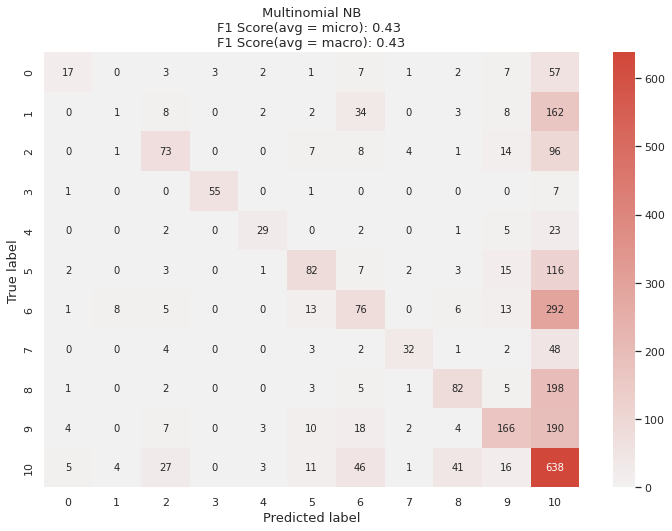

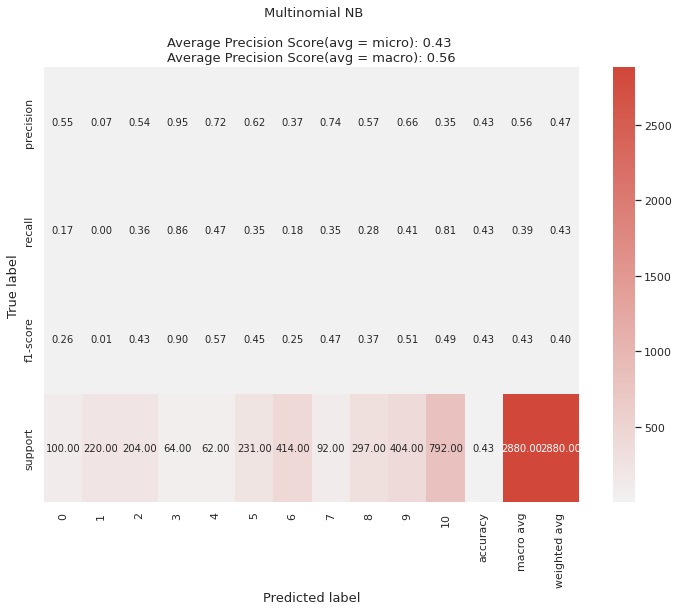

  Now transforming Train data to return as output...
    Time Taken for Expanding emojis and abbreviations in data = 0 seconds
        Time Taken for Processing text in data = 16 seconds
  Transforming Test data to return as output...
    Time Taken for Expanding emojis and abbreviations in data = 0 seconds
        Time Taken for Processing text in data = 3 seconds
###    AFTER BEST NLP TRANSFORMER SELECTED, NOW ENRICH TEXT DATA  ##############
    Now transforming NLP_column for train and test data using best vectorizer...
Reducing dimensions from 3395 term-matrix to 58 dimensions using TruncatedSVD...
    Reduced dimensional array shape to (14396, 58)
    Time Taken for Truncated SVD = 1 seconds
TruncatedSVD Data Frame size = (14396, 58)
Reducing dimensions from 3395 term-matrix to 58 dimensions using TruncatedSVD...
    Reduced dimensional array shape to (3600, 58)
    Time Taken for Truncated SVD = 0 seconds
TruncatedSVD Data Frame size = (3600, 58)
Creating word clusters using ter

[nltk_data] Downloading collection 'popular'
[nltk_data]    | 
[nltk_data]    | Downloading package cmudict to /root/nltk_data...
[nltk_data]    |   Package cmudict is already up-to-date!
[nltk_data]    | Downloading package gazetteers to /root/nltk_data...
[nltk_data]    |   Package gazetteers is already up-to-date!
[nltk_data]    | Downloading package genesis to /root/nltk_data...
[nltk_data]    |   Package genesis is already up-to-date!
[nltk_data]    | Downloading package gutenberg to /root/nltk_data...
[nltk_data]    |   Package gutenberg is already up-to-date!
[nltk_data]    | Downloading package inaugural to /root/nltk_data...
[nltk_data]    |   Package inaugural is already up-to-date!
[nltk_data]    | Downloading package movie_reviews to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Package movie_reviews is already up-to-date!
[nltk_data]    | Downloading package names to /root/nltk_data...
[nltk_data]    |   Package names is already up-to-date!
[nltk_data]    | Do

Auto NLP processing on NLP Column: Track Name
Shape of Train Data: 14396 rows
    Shape of Test Data: 3600 rows


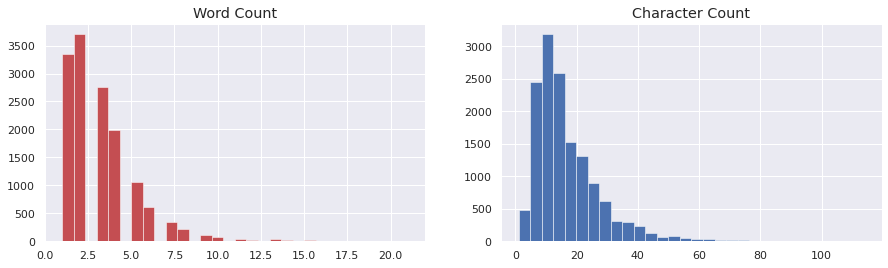

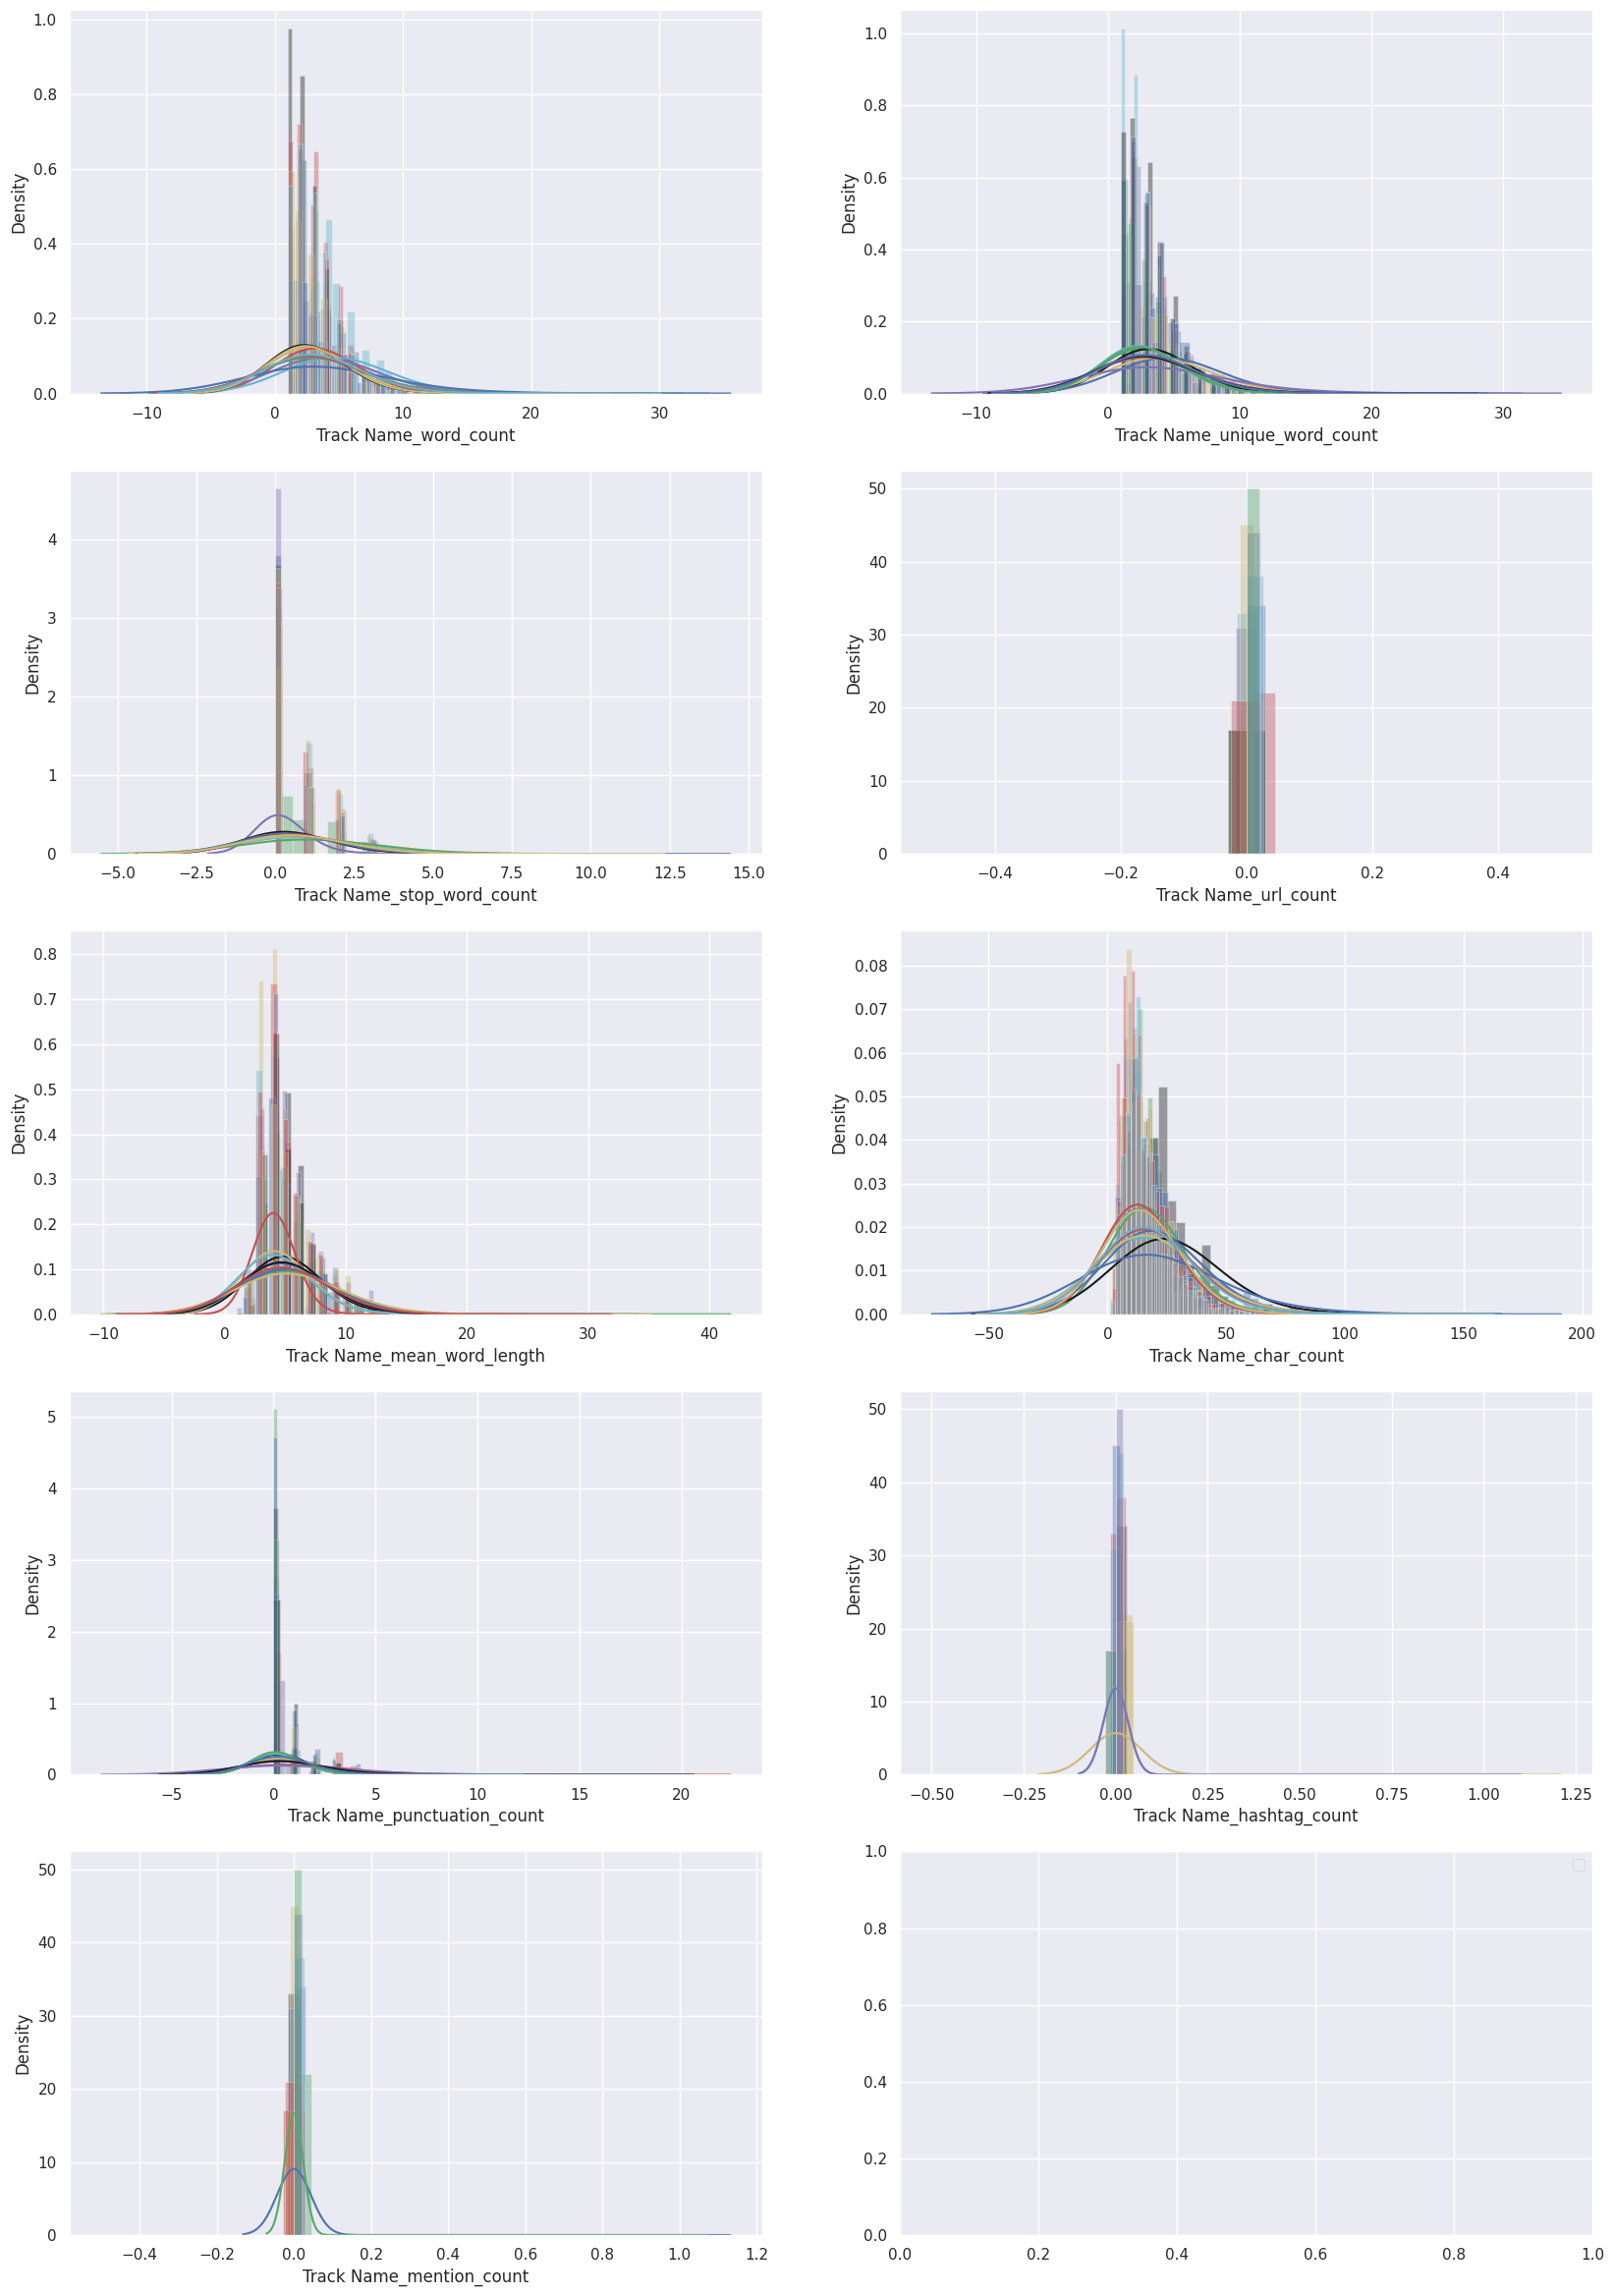

    Added 9 summary columns for counts of words and characters in each row
Cleaning text in Train data for Track Name column
    Faster text processing using clean_text function, since top_num_features is below 300
    Time Taken for Expanding emojis and abbreviations in data = 0 seconds
        Time Taken for Processing text in data = 14 seconds
Train data Text cleaning completed. Time taken = 24 seconds

For target = Class

    For class = 0
Top 200 n-grams
: ['acoustic', 'love', 'not', 'do', 'feat', 'girl', 'me', 'remaster', 'go', 'run', 'way', 'your', 'sakhi', 'spotify', 'session', 'live', 'fire', 'great', 'take', 'sweet', 'version', 'remastered', 'naina', 'matt', 'ahi', 'billy', 'edit', 'ke', 'krishna', 'laura', 'light', 'lucy', 'mr', 'rasiya', 'river', 'road', 'sitar', 'sri', 'villager', 'wind', 'studio', 'come', 'allison', 'black', 'weather', 'new', 'fall', 'life', 'morey', 'after', 'dream', 'hope', 'mix', 'world', 'boy', 'daughter', 'native', 'sun', 'day', 'young', 'donovan', '

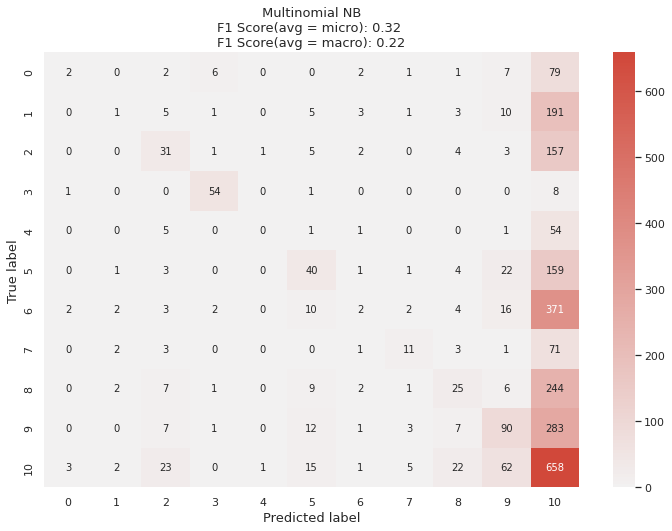

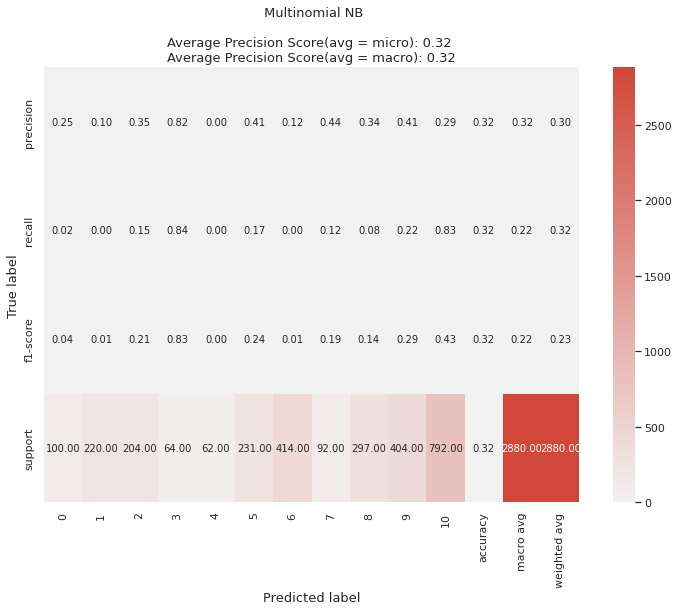

  Now transforming Train data to return as output...
    Time Taken for Expanding emojis and abbreviations in data = 0 seconds
        Time Taken for Processing text in data = 23 seconds
  Transforming Test data to return as output...
    Time Taken for Expanding emojis and abbreviations in data = 0 seconds
        Time Taken for Processing text in data = 6 seconds
###    AFTER BEST NLP TRANSFORMER SELECTED, NOW ENRICH TEXT DATA  ##############
    Now transforming NLP_column for train and test data using best vectorizer...
Reducing dimensions from 1043 term-matrix to 32 dimensions using TruncatedSVD...
    Reduced dimensional array shape to (14396, 32)
    Time Taken for Truncated SVD = 0 seconds
TruncatedSVD Data Frame size = (14396, 32)
Reducing dimensions from 1043 term-matrix to 32 dimensions using TruncatedSVD...
    Reduced dimensional array shape to (3600, 32)
    Time Taken for Truncated SVD = 0 seconds
TruncatedSVD Data Frame size = (3600, 32)
Creating word clusters using ter

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

Learning rate set to 0.053917
0:	test: 0.8990154	best: 0.8990154 (0)	total: 135ms	remaining: 15m 43s


500:	test: 0.9604899	best: 0.9605958 (485)	total: 47s	remaining: 10m 10s
1000:	test: 0.9596903	best: 0.9605958 (485)	total: 1m 30s	remaining: 9m
1500:	test: 0.9589179	best: 0.9605958 (485)	total: 2m 12s	remaining: 8m 6s
2000:	test: 0.9580410	best: 0.9605958 (485)	total: 2m 56s	remaining: 7m 20s
Stopped by overfitting detector  (2000 iterations wait)

bestTest = 0.9605957848
bestIteration = 485

Shrink model to first 486 iterations.
    Actual training time (in seconds): 218
###########  Single_Label  M O D E L   R E S U L T S #################
5-fold Cross Validation  balanced_accuracy = 96.1%
    CatBoost Best Parameters for Model: Iterations = 485, learning_rate = 0.05
########################################################
CatBoost Model Prediction Results on Held Out CV Data Set:
Multi Class Model Metrics Report
#####################################################
    Accuracy          = 57.3%
    Balanced Accuracy (average recall) = 62.3%
    Average Precision (macro) = 63.7%
  

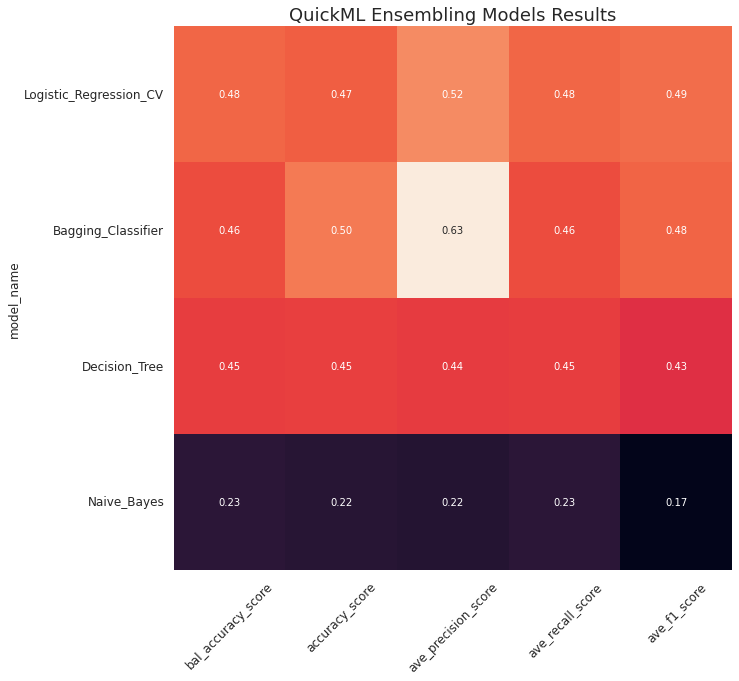

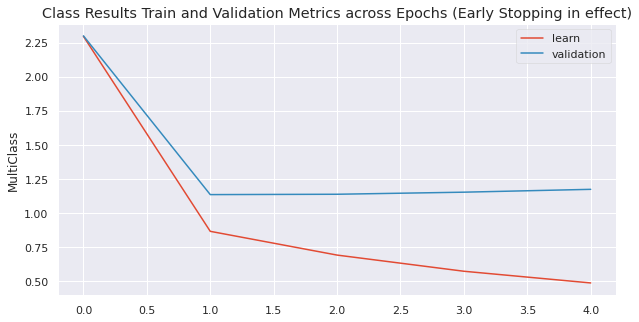

    Time taken for this Target (in seconds) = 421
    Binning_Flag set to False or there are no float vars in data set to be binned
    Setting best params for CatBoost model from Initial State since you cannot change params to a fitted Catboost model 
    Number of Categorical and Integer variables used in CatBoost training = 124
No MinMax scaling performed since scaling flag is set to false
###########################################################################
#####   F I N A L I Z I N G   M O D E L   O N    F U L L   T R A I N  #####
###########################################################################
0:	total: 118ms	remaining: 56.9s
484:	total: 52.5s	remaining: 0us
     Actual Training time taken in seconds = 53
Training of models completed. Now starting predictions on test data...
    Calculating weighted average ensemble of 5 classifiers
    Plotting Feature Importances to explain the output of model
Trying to plot SHAP values if SHAP is installed in this machine...


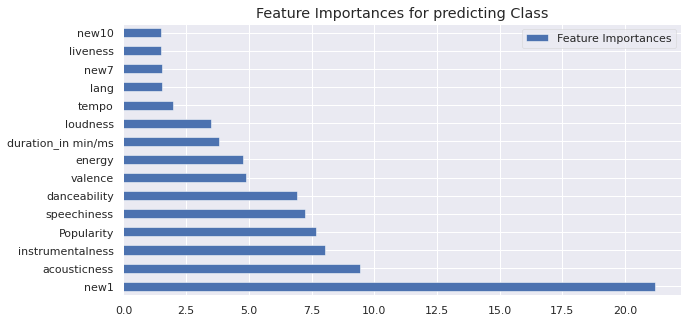

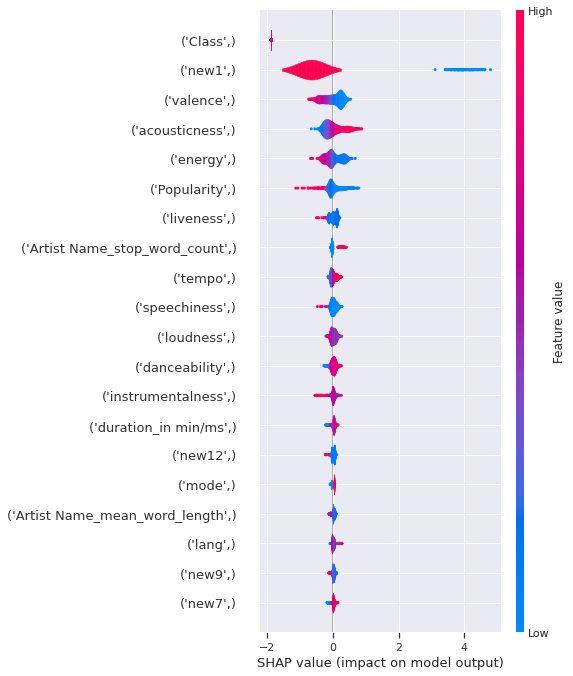

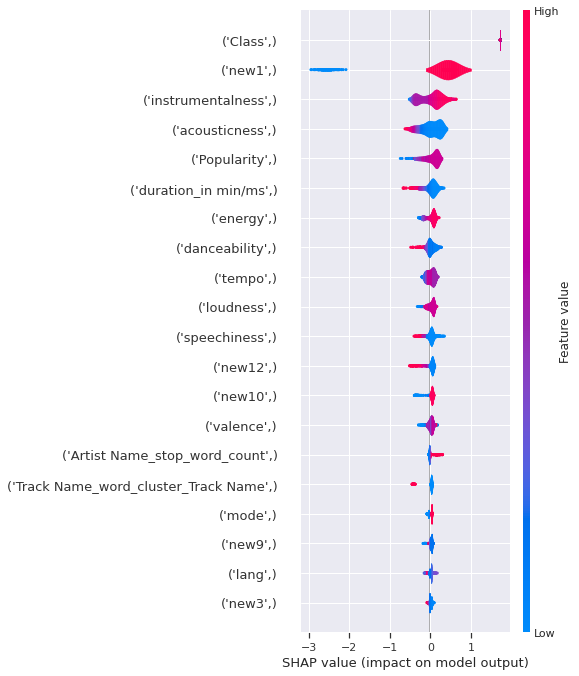

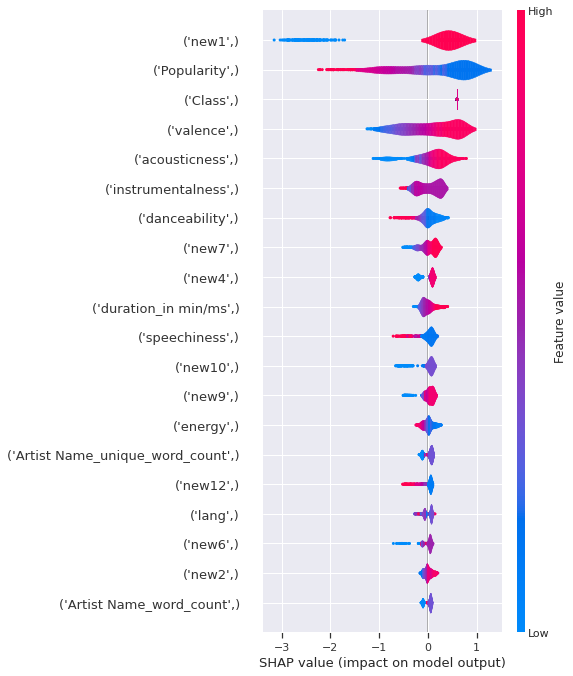

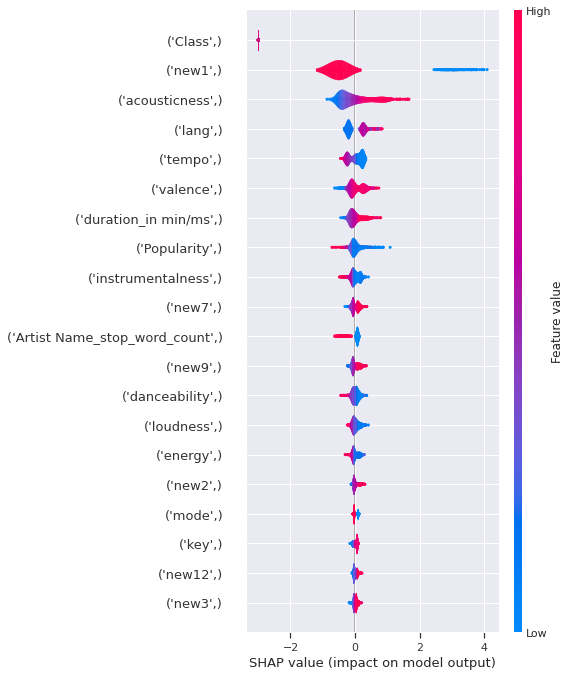

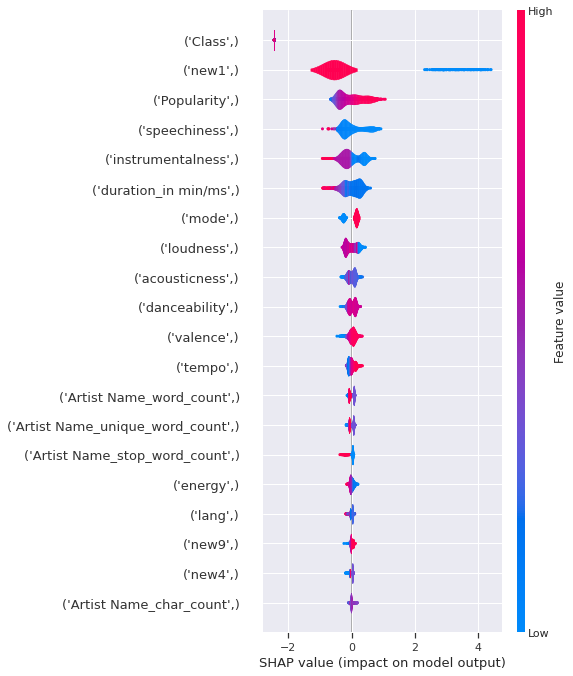

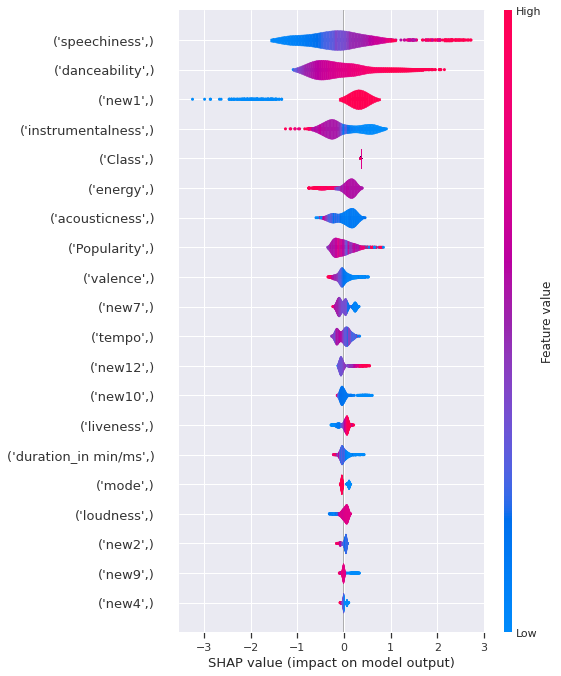

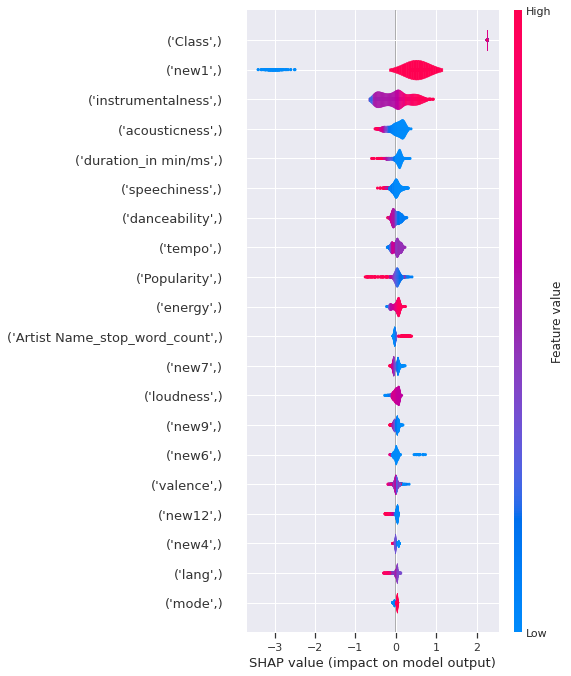

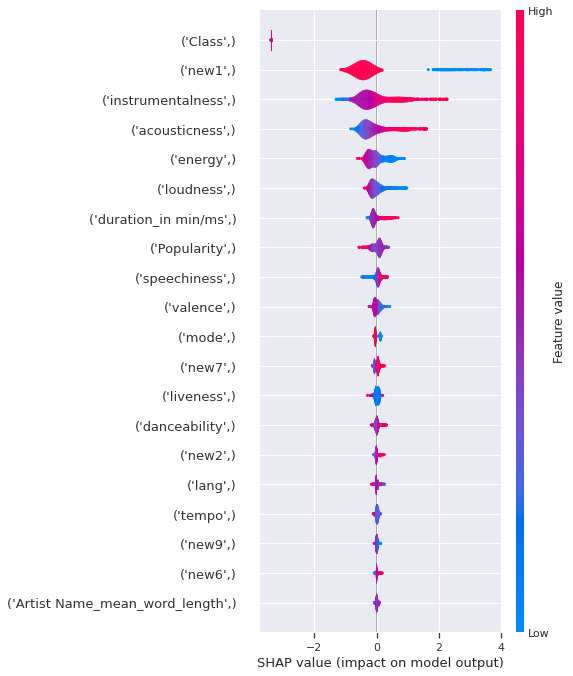

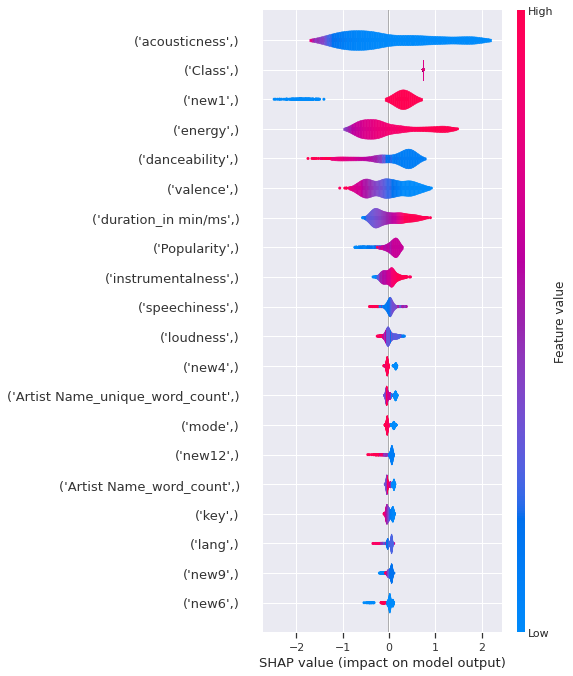

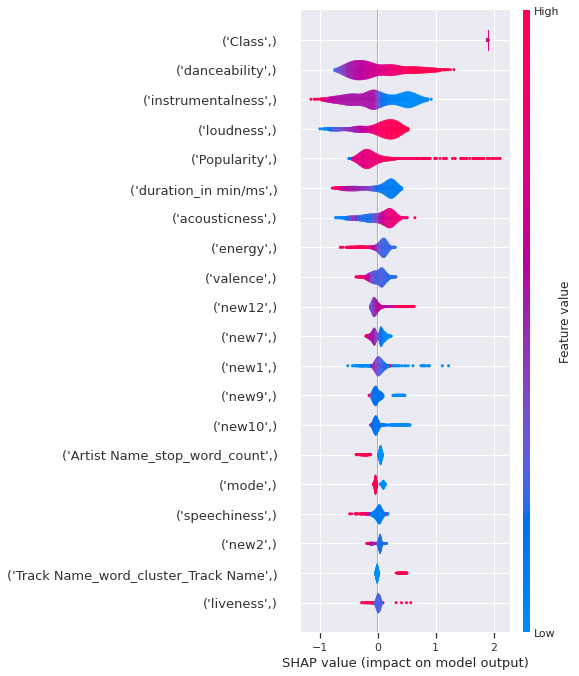

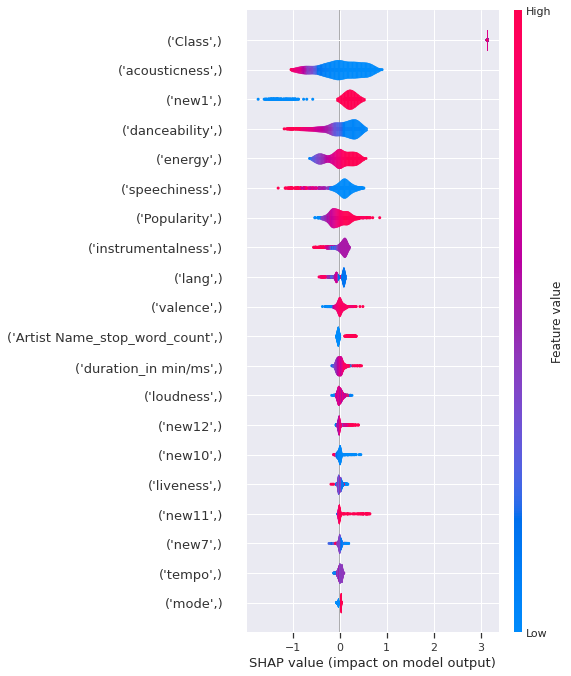

############### P R E D I C T I O N  O N  T E S T   C O M P L E T E D  #################
    Time taken thus far (in seconds) = 540
Writing Output files to disk...
    Saving predictions to ./Class/Class_Multi_Classification_test_modified.csv
    Saving predictions to ./Class/Class_Multi_Classification_submission.csv
    Saving predictions to ./Class/Class_Multi_Classification_train_modified.csv
###############  C O M P L E T E D  ################
Time Taken in mins = 9.0 for the Entire Process


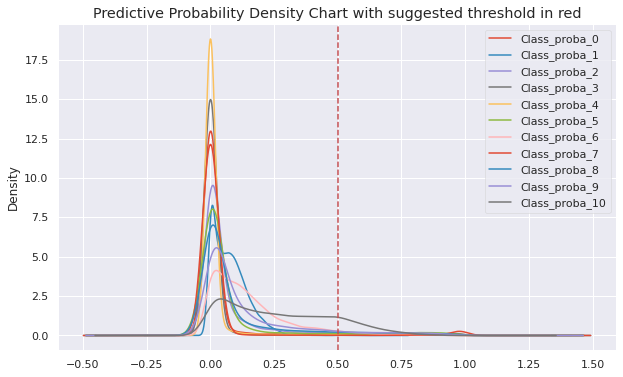

In [23]:
target  = 'Class'
model, features, trainm, testm = Auto_ViML(
    train2,
    target,
    test2,
    #sub,
    hyper_param="RS",
    feature_reduction=False,
    scoring_parameter= "balanced_accuracy",#"neg_log_loss",#
    KMeans_Featurizer=False,
    Boosting_Flag= 'catboost',#True,#
    Binning_Flag=False,
    Add_Poly=0,
    Stacking_Flag=False,
    Imbalanced_Flag=False,
    verbose=2
)

In [24]:
testm.to_csv('testm.csv',index=False)
testm = pd.read_csv('testm.csv')

In [25]:
# submition file build
sub['Acoustic/Folk_0']= testm['Class_proba_0']
sub['Alt_Music_1']= testm['Class_proba_1']
sub['Blues_2']= testm['Class_proba_2']
sub['Bollywood_3']= testm['Class_proba_3']
sub['Country_4']= testm['Class_proba_4']
sub['HipHop_5']= testm['Class_proba_5']
sub['Indie Alt_6']= testm['Class_proba_6']
sub['Instrumental_7']= testm['Class_proba_7']
sub['Metal_8']= testm['Class_proba_8']
sub['Pop_9']= testm['Class_proba_9']
sub['Rock_10']= testm['Class_proba_10']

In [26]:
#sub.to_csv('baseline_v4c.csv',index=False)

In [27]:
# sub = pd.read_csv('/content/testm.csv')
# submission = pd.DataFrame()
# submission['id: 0'] = sub['id: 0']
# submission['Class'] = pred[0:10900]
# submission.to_csv('submission.csv', index=False)

In [28]:
newsub=testm[['id','Class_Ensembled_predictions']]

In [29]:
newsub

,id,Class_Ensembled_predictions
0,0,10
1,1,10
2,2,8
3,3,10
4,4,10
...,...,...
3595,3595,5
3596,3596,9
3597,3597,9
3598,3598,6


In [30]:
newsub = newsub.rename(columns={'Class_Ensembled_predictions': 'Class'})

In [31]:
newsub

,id,Class
0,0,10
1,1,10
2,2,8
3,3,10
4,4,10
...,...,...
3595,3595,5
3596,3596,9
3597,3597,9
3598,3598,6


In [32]:
newsub.to_csv('sub1.csv', index=False)

In [33]:
newsub2=testm[['id','Class_Logistic_Regression_CV_predictions']]

In [34]:
newsub2 = newsub2.rename(columns={'Class_Logistic_Regression_CV_predictions': 'Class'})

In [35]:
newsub2.to_csv('sub2.csv', index=False)

In [36]:
newsub3=testm[['id','Class_CatBoost_predictions']]

In [37]:
newsub3 = newsub3.rename(columns={'Class_CatBoost_predictions': 'Class'})

In [38]:
newsub3.to_csv('sub33.csv', index=False)

In [39]:
newsub4=testm[['id','Class_Bagging_Classifier_predictions']]

In [40]:
newsub4 = newsub4.rename(columns={'Class_Bagging_Classifier_predictions': 'Class'})

In [41]:
newsub4.to_csv('new.csv', index=False)

In [42]:
# Drop Un-needed Columns 
del_cols = ['id','Artist Name','Track Name']
train.drop(columns=del_cols, inplace=True)
test.drop(columns=del_cols, inplace=True)

train.shape, test.shape

((14396, 15), (3600, 15))

In [43]:
# Filling the missing values
# Train set
train['Popularity'].fillna(train['Popularity'].mean(), inplace=True) # Popularity --> mean
train['instrumentalness'].fillna(train['instrumentalness'].mean(), inplace=True) # instrumentalness --> mean

key_mode = train['key'].mode()[0]
train['key'].fillna(key_mode, inplace=True) # key --> mode (most common)


# Test set
test['Popularity'].fillna(train['Popularity'].mean(), inplace=True) # Popularity --> mean
test['instrumentalness'].fillna(train['instrumentalness'].mean(), inplace=True) # instrumentalness --> mean
test['key'].fillna(key_mode, inplace=True) # key --> mode (most common)

In [44]:
# Check if there any missing values in the training and the test sets
train.isnull().sum().sum(), test.isnull().sum().sum()

(0, 0)

In [45]:
# Make Object
mms = MinMaxScaler()

# Determine The required columns for scaling
scaled_cols = ['Popularity','loudness','tempo']

train[scaled_cols] = mms.fit_transform(train[scaled_cols]) # Fit & Transform --> train set
test[scaled_cols] = mms.transform(test[scaled_cols]) # Transform --> test set

train.head()

,Popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_in min/ms,time_signature,Class
0,0.22,0.37,0.67,7.00,0.70,0,0.04,0.81,0.00,0.24,0.80,0.78,5.21,3,3
1,0.44,0.66,0.64,6.00,0.77,1,0.39,0.42,0.18,0.12,0.69,0.36,"206,602.00",4,5
2,0.51,0.46,0.73,11.00,0.68,0,0.14,0.05,0.02,0.12,0.78,0.25,"218,960.00",4,6
3,0.39,0.51,0.29,5.00,0.75,0,0.05,0.83,0.18,0.10,0.32,0.34,"332,467.00",3,9
4,0.63,0.55,0.48,9.00,0.75,1,0.03,0.52,0.11,0.16,0.51,0.20,"200,173.00",4,1


In [74]:
# Feature Extraction 
#Make new feature with the song duration in minutes
train['duration in min'] = train['duration_in min/ms'] / 60_000
test['duration in min'] = test['duration_in min/ms'] / 60_000

# Drop the old features "duration in ms"
train.drop(columns='duration_in min/ms', inplace=True)
test.drop(columns='duration_in min/ms', inplace=True)

In [75]:
# Calculate Feature Importances to make Feature Selection
model = RandomForestClassifier()
model.fit(train.drop(columns='Class'), train.Class)

feat_imp = pd.Series(model.feature_importances_ * 100, index=train.drop(columns='Class').columns).sort_values(ascending=False)
feat_imp

duration in min    12.50
acousticness       10.69
speechiness        10.04
danceability        8.93
energy              8.87
Popularity          8.29
instrumentalness    8.22
valence             8.13
loudness            8.01
tempo               6.35
liveness            6.20
key                 3.76
dtype: float64

In [76]:
import plotly.express as px

In [77]:
px.bar(feat_imp.sort_values(ascending=True), orientation='h')

In [79]:
del_cols = ['time_signature','mode']
train.drop(columns=del_cols, inplace = True)
test.drop(columns=del_cols, inplace = True)

train.shape, test.shape

KeyError: ignored

In [52]:
# Splitting the data
X = train.drop(columns='Class')
y = train['Class']

# Making the Training set
X_train, X_rem, y_train, y_rem = train_test_split(X, y, test_size=0.2, random_state=42)

# Making the Val & Testing sets
X_val, X_test, y_val, y_test = train_test_split(X_rem, y_rem, test_size=0.5, random_state=42)

X_train.shape, y_train.shape, X_val.shape, y_val.shape, X_test.shape, y_test.shape

((11516, 12), (11516,), (1440, 12), (1440,), (1440, 12), (1440,))

In [53]:
nr = Normalizer()
X_train_scaled = nr.fit_transform(X_train)
X_test_scaled = nr.transform(X_test)

In [54]:
svm_clf = SVC()
svm_clf.fit(X_train_scaled, y_train)
svm_clf.predict(X_test_scaled)
cross_val_score(svm_clf, X_train_scaled, y_train, cv=3, scoring="accuracy")

array([0.33836937, 0.34149518, 0.34106305])

In [55]:
sgd_clf = SGDClassifier(random_state=42)
sgd_clf.fit(X_train_scaled, y_train)
y_pred = sgd_clf.predict(X_test_scaled)

In [56]:
cross_val_score(sgd_clf, X_train_scaled, y_train, cv=3, scoring="accuracy")

array([0.2185465 , 0.14561084, 0.33011985])

In [57]:
knn_clf=KNeighborsClassifier(n_neighbors=3)
knn_clf.fit(X_train_scaled,y_train)
y_pred=knn_clf.predict(X_test_scaled)
cross_val_score(knn_clf, X_train_scaled, y_train, cv=3, scoring="accuracy")

array([0.33342016, 0.31909351, 0.32047942])

In [58]:
xgb_clf = xgb.XGBClassifier()
xgb_clf.fit(X_train_scaled, y_train)
preds = xgb_clf.predict(X_test_scaled)
cross_val_score(xgb_clf, X_train_scaled, y_train, cv=3, scoring="accuracy")

array([0.47356082, 0.47538421, 0.46743095])

In [59]:
ovr_clf = OneVsRestClassifier(SVC())
ovr_clf.fit(X_train_scaled, y_train)
ovr_clf.predict(X_test_scaled)

array([9, 9, 9, ..., 9, 3, 9])

In [60]:
cross_val_score(ovr_clf, X_train_scaled, y_train, cv=3, scoring="accuracy")

array([0.34592342, 0.19927064, 0.22824388])

In [61]:
forest_clf = RandomForestClassifier(random_state=42)
forest_clf.fit(X_train_scaled, y_train) 
forest_clf.predict(X_test_scaled)
cross_val_score(forest_clf, X_train_scaled, y_train, cv=3, scoring="accuracy")

array([0.40036468, 0.39202917, 0.39682126])

In [62]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.38      0.66      0.48        44
           1       0.07      0.18      0.10        89
           2       0.24      0.29      0.26       112
           3       0.59      0.51      0.55        45
           4       0.36      0.29      0.32        28
           5       0.39      0.40      0.39       105
           6       0.17      0.18      0.17       193
           7       0.85      0.82      0.83        49
           8       0.43      0.36      0.39       146
           9       0.42      0.25      0.32       221
          10       0.45      0.34      0.39       408

    accuracy                           0.33      1440
   macro avg       0.40      0.39      0.38      1440
weighted avg       0.37      0.33      0.34      1440



In [63]:
cf_matrix = confusion_matrix(y_test, y_pred)
print(cf_matrix)

[[ 29   0   0   5   4   0   0   2   0   4   0]
 [  0  16  11   0   0   7  22   0   5   5  23]
 [  0  20  32   0   0   5  18   0   3  10  24]
 [ 15   0   0  23   0   0   0   4   0   1   2]
 [ 11   0   0   4   8   0   0   1   0   4   0]
 [  0  14   5   0   0  42  13   0   1  18  12]
 [  0  47  18   0   0  16  35   0   8  17  52]
 [  4   0   0   4   0   0   0  40   0   1   0]
 [  0  22   2   0   0   1  29   0  52   2  38]
 [ 14  40  26   3   7  17  31   0   4  56  23]
 [  3  80  38   0   3  20  62   0  48  14 140]]


In [64]:
# Random Forest Classifier
forest_clf = RandomForestClassifier()

param_grid= {
 'bootstrap': [True, False],
 'max_depth': [10, 20],
 'n_estimators': [50, 100, 200]
}
grid_model= GridSearchCV(estimator= forest_clf, param_grid= param_grid, scoring= "accuracy")

grid_model.fit(X_train_scaled, y_train)
grid_model.best_params_

{'bootstrap': True, 'max_depth': 20, 'n_estimators': 200}

In [65]:
# XGBoost Classifier
xgb_clf = xgb.XGBClassifier()

max_depth = [2, 5, 10]
learning_rate = [0.001, 0.01, 0.1, 1]
n_estimators = [50, 100, 200]


param_grid= {
 'max_depth': max_depth,
 'learning_rate': learning_rate,
 'n_estimators': n_estimators
}
grid_model= GridSearchCV(estimator= xgb_clf, param_grid= param_grid, scoring= "accuracy")

grid_model.fit(X_train_scaled, y_train)
grid_model.best_params_

{'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 100}

In [66]:
svm_clf = SVC()

C = [1, 3]
kernel = ['rbf','linear']
gamma = [1]

param_grid= {
 'C': C,
 'kernel': kernel,
 'gamma': gamma
}
grid_model= GridSearchCV(estimator= xgb_clf, param_grid= param_grid, scoring= "accuracy")

grid_model.fit(X_train_scaled, y_train)
grid_model.best_params_

[06:55:39] WARNING: ../src/learner.cc:767: 
Parameters: { "C", "kernel" } are not used.

[06:55:58] WARNING: ../src/learner.cc:767: 
Parameters: { "C", "kernel" } are not used.

[06:56:17] WARNING: ../src/learner.cc:767: 
Parameters: { "C", "kernel" } are not used.

[06:56:36] WARNING: ../src/learner.cc:767: 
Parameters: { "C", "kernel" } are not used.

[06:57:00] WARNING: ../src/learner.cc:767: 
Parameters: { "C", "kernel" } are not used.

[06:57:21] WARNING: ../src/learner.cc:767: 
Parameters: { "C", "kernel" } are not used.

[06:57:39] WARNING: ../src/learner.cc:767: 
Parameters: { "C", "kernel" } are not used.

[06:57:58] WARNING: ../src/learner.cc:767: 
Parameters: { "C", "kernel" } are not used.

[06:58:18] WARNING: ../src/learner.cc:767: 
Parameters: { "C", "kernel" } are not used.

[06:58:36] WARNING: ../src/learner.cc:767: 
Parameters: { "C", "kernel" } are not used.

[06:58:55] WARNING: ../src/learner.cc:767: 
Parameters: { "C", "kernel" } are not used.

[06:59:14] WARNING: .

{'C': 1, 'gamma': 1, 'kernel': 'rbf'}

In [67]:
forest_clf_tuned = RandomForestClassifier(bootstrap= True, max_depth= 10, n_estimators= 100)
xgb_clf_tuned = xgb.XGBClassifier(learning_rate= 0.1, max_depth= 5, n_estimators= 100)
svm_clf_tuned = SVC(C= 1, gamma= 1, kernel= 'rbf')

In [68]:
VotingClassifierModel = VotingClassifier(estimators=[('RFModel',forest_clf_tuned),
                                                     ('SVMModel',svm_clf_tuned),
                                                     ('XGBModel',xgb_clf_tuned)],
                                                     voting='hard')
VotingClassifierModel.fit(X_train, y_train)
print('VotingClassifierModel Train Score is : ' , VotingClassifierModel.score(X_train, y_train))
print('VotingClassifierModel Test Score is : ' , VotingClassifierModel.score(X_test, y_test))

VotingClassifierModel Train Score is :  0.7278568947551233
VotingClassifierModel Test Score is :  0.5361111111111111


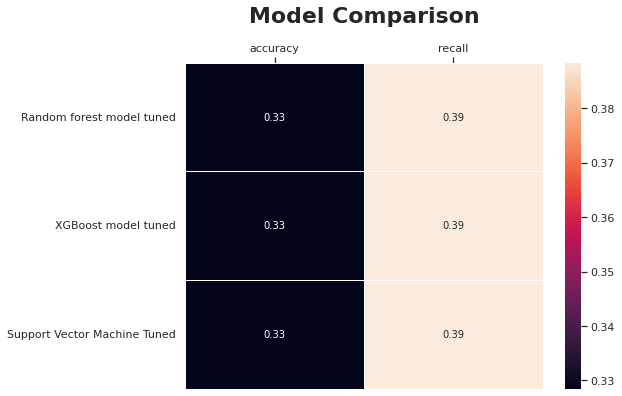

In [70]:
plt.figure(figsize= (8, 6))

results_df = pd.DataFrame(
    data=[["Random forest model tuned", accuracy_score(y_test, y_pred), recall_score(y_test, y_pred, average= 'macro')],
          ["XGBoost model tuned", accuracy_score(y_test, y_pred), recall_score(y_test, y_pred, average= 'macro')],
          ["Support Vector Machine Tuned", accuracy_score(y_test, y_pred), recall_score(y_test, y_pred, average= 'macro')]], 
    columns=['Model', 'accuracy', 'recall'])

data= results_df[:3].set_index("Model").sort_values("accuracy", ascending= False)

ax= sns.heatmap(data, annot=True, fmt=".2f", linewidths= 1)

ax.xaxis.tick_top()
plt.title("Model Comparison", fontsize= 22, fontweight= "bold", pad= 40)
plt.ylabel("")

# Optional if you want to save the comparison on your machine as a pic


plt.show()

In [71]:
submission = pd.read_csv('/content/drive/MyDrive/shai-training-level-1-b/submission.csv')

In [72]:
y_pred_final = VotingClassifierModel.predict(test)
submission['Class'] = y_pred_final
submission.to_csv("submission.csv", index=False)
submission

ValueError: ignored